In [1]:
#include parent folder
import os, sys, inspect

currentdir = os.path.dirname(
    os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

import matplotlib.pyplot as plt
import numpy as np

from src.domain import Domain, Epot

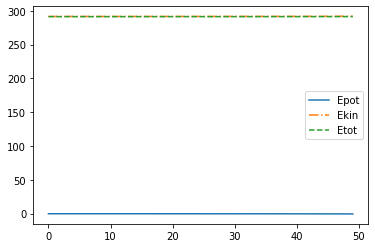

In [2]:
N = 200
rho = 0.01
L = (N/rho)**(1/3)
sigma = 1

domain = Domain(Epot)
domain.fill(N, L, spread=0, std_dev=sigma)
#domain.minimizeEnergy()

Epot_vals = []
Ekin_vals = []
for i in range(50):
    domain.verlet_advance(0.01)
    Epot_vals.append(domain.Epot())
    Ekin_vals.append(domain.Ekin())

Epot_vals = np.array(Epot_vals)
Ekin_vals = np.array(Ekin_vals)
Etot_vals = Epot_vals + Ekin_vals

plt.plot(Epot_vals, label="Epot")
plt.plot(Ekin_vals, "-.",label="Ekin")
plt.plot(Etot_vals, "--",label="Etot")
plt.legend()

3043.498725163253


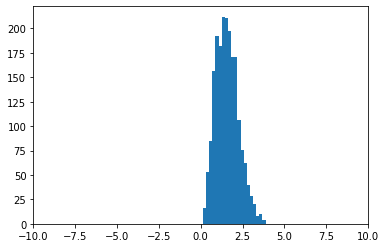

In [3]:
N = 2000
rho = 0.8
L = (N/rho)**(1/3)
sigma = 1

domain = Domain(Epot)
domain.fill(N, L, spread=0, std_dev=sigma)

n_bins = 20
plt.hist(np.sqrt(domain.vel.T[0]**2 + domain.vel.T[1]**2 + domain.vel.T[2]**2), bins=n_bins)
plt.xlim([-10,10])
print(domain.Ekin())

In [4]:
N = 10

rho = 0.8
L = (N/rho)**(1/3)
sigma = 1

domain = Domain(Epot)
domain.fill(N, L, spread=0, std_dev=sigma)
print(domain.Epot())
domain.minimizeEnergy()
print(domain.Epot())


8284.4072265625
-1.0000016689300537
